**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import data 2C_weka.csv for 2 Class Classifcation.


In [333]:
data2C = pd.read_csv('2Classdata.csv')
data2C.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [334]:
data2C.tail(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [335]:
print(data2C.shape)


(310, 7)


In [336]:
data2C.isna().sum()


pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

No missing value

In [337]:
data2C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


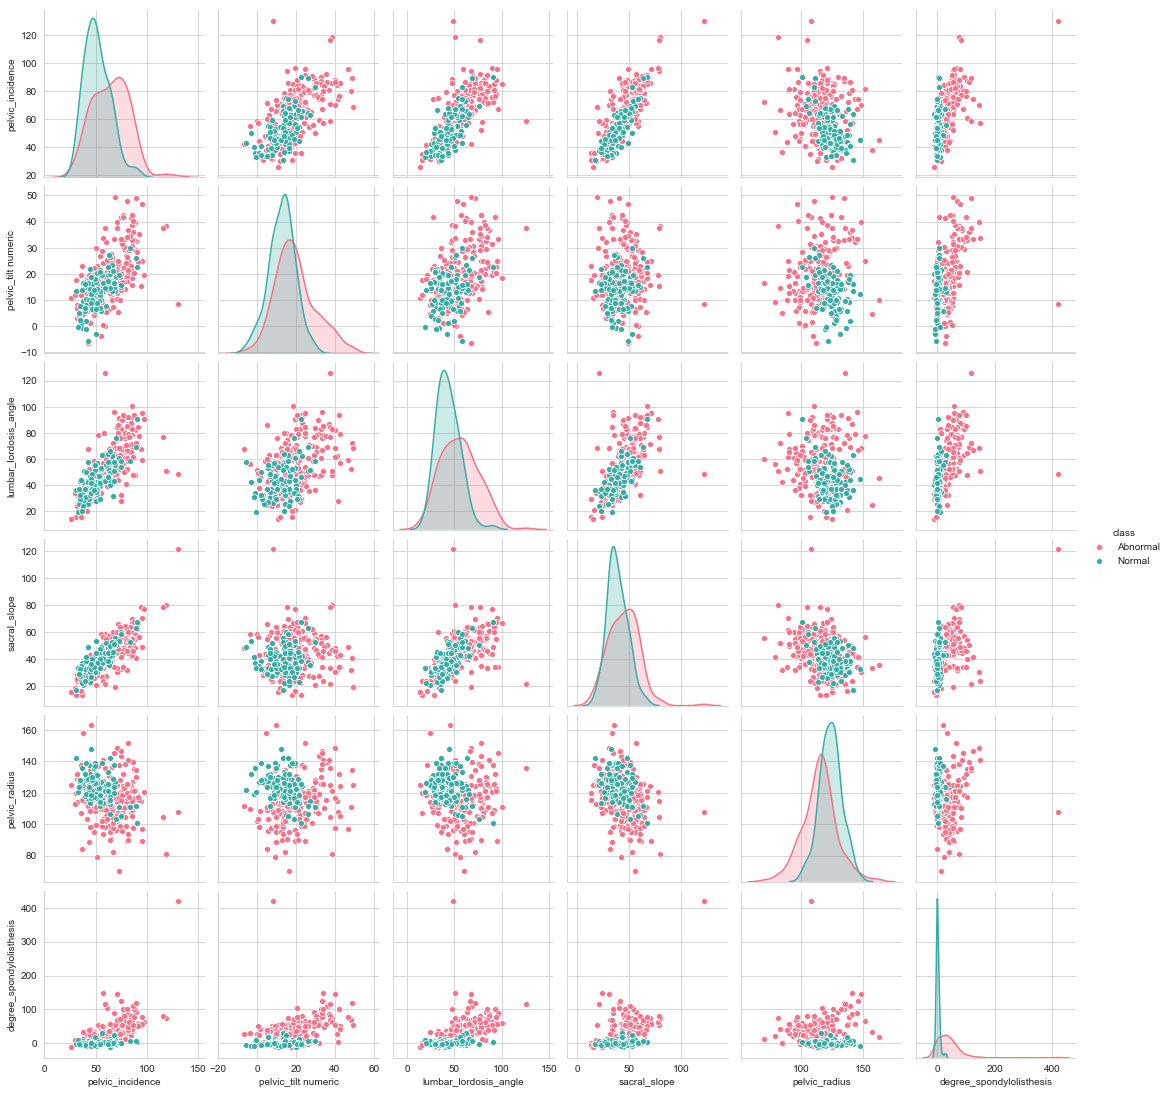

In [338]:
sns.pairplot(data2C,hue='class',palette='husl')

Abnormal    210
Normal      100
Name: class, dtype: int64

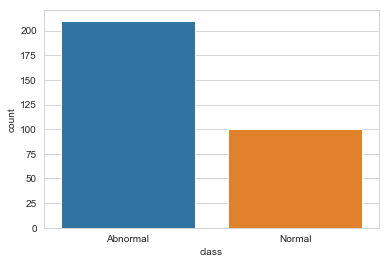

In [339]:
#Counts number of classes
sns.countplot(x="class", data=data2C)
data2C.loc[:,'class'].value_counts()

There are more abnormal= 210 cases than normal =100 cases in the dataset.

Boxplot

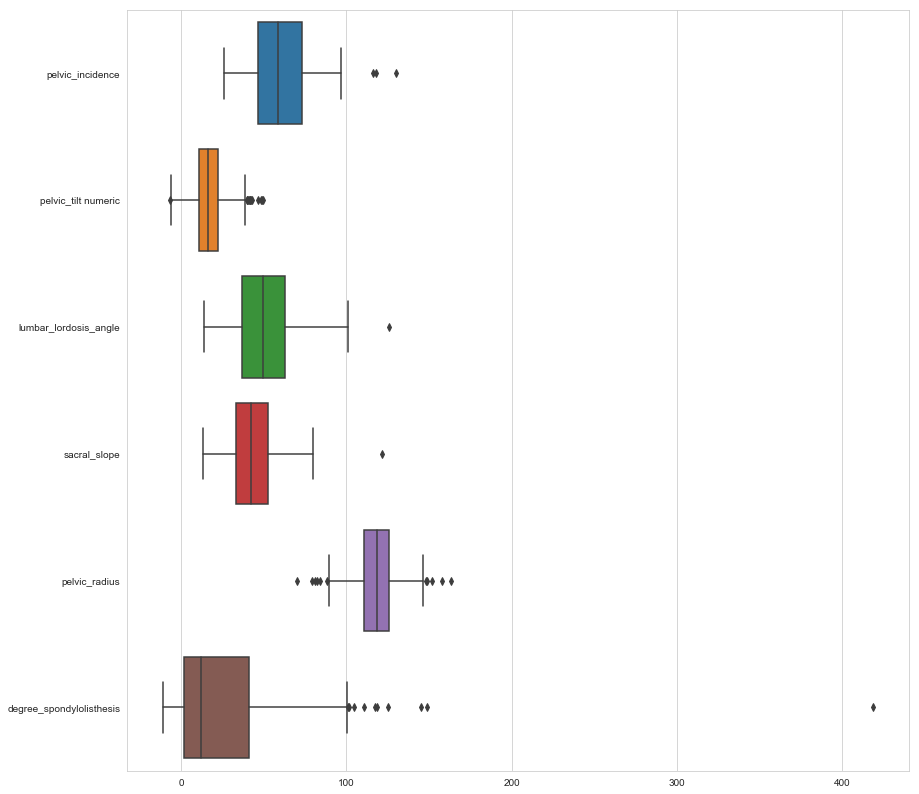

In [340]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,14))
sns.boxplot(data=data2C, orient="h")

In [341]:
data2C.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


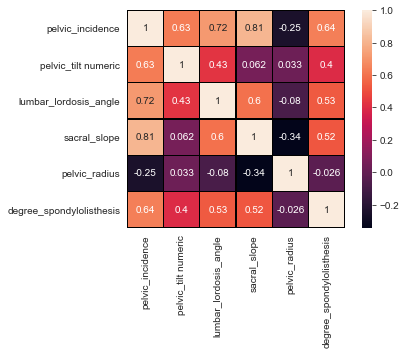

In [342]:
sns.heatmap(data2C.corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='black', annot=True)

The highest correlation of Pelvic Incidence are sacral_slope (0.81), followed by lumbar_lordosis_angle (0.72), degree_spondylolisthesis (0.64) and pelvic_tilt_numermic (0.63)

# Encode the Class variable to integer.

In [343]:
data2C_objCol = data2C.select_dtypes(include='object').columns
data2C_objCol

Index(['class'], dtype='object')

In [344]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for xCol in data2C_objCol:
    data2C[xCol] = le.fit_transform(data2C[xCol])

In [345]:
data2C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null int64
dtypes: float64(6), int64(1)
memory usage: 17.0 KB


In [346]:
data2C['class']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
280    1
281    1
282    1
283    1
284    1
285    1
286    1
287    1
288    1
289    1
290    1
291    1
292    1
293    1
294    1
295    1
296    1
297    1
298    1
299    1
300    1
301    1
302    1
303    1
304    1
305    1
306    1
307    1
308    1
309    1
Name: class, Length: 310, dtype: int64

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [347]:
# Target values -> class
X = data2C.drop('class',axis=1)
y = data2C['class']
# Feature set is remaining features

print(data2C.shape, X.shape, y.shape)

(310, 7) (310, 6) (310,)


# Normalize your Data (X) to get values between 0 to 1.

In [348]:
data2C.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


In [349]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
pd.DataFrame(sc.fit_transform(X))

,0,1,2,3,4,5
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
5,0.136009,0.365744,0.099559,0.119943,0.647879,0.030933
6,0.263150,0.400439,0.207316,0.223960,0.542916,0.039680
7,0.185356,0.309190,0.134581,0.196592,0.507455,0.000890
8,0.170151,0.358811,0.256759,0.156294,0.590614,0.056674
9,0.101638,0.206581,0.250118,0.169425,0.152264,0.027287


# Split the dat as train and test with a ratio of 70:30.

In [350]:
# Train & test, for K=3
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1) 
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 217 samples.
Testing set has 93 samples.


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [351]:
from sklearn.neighbors import KNeighborsClassifier
# for k=3
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [352]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
f1score = f1_score(y_test,y_predict)
acc_score = accuracy_score(y_test,y_predict)
print(" Testing Accuracy: {}".format(knn.score(X_test,y_test)))
print(" Training Accuracy: {}".format(knn.score(X_train,y_train)))

print('\n KNN  score:{} , accuracy:{}'.format(f1score,acc_score))

 Testing Accuracy: 0.8602150537634409
 Training Accuracy: 0.9032258064516129

 KNN  score:0.7636363636363638 , accuracy:0.8602150537634409


#### Naive Bayes Classifier

In [353]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_predict_gnb = gnb.predict(X_test)
f1score_gnb = f1_score(y_test,y_predict_gnb)
acc_score_gnb = accuracy_score(y_test,y_predict_gnb)
print('Naive Bayes Classifier\n score:{} , accuracy:{}'.format(f1score_gnb,acc_score_gnb))

Naive Bayes Classifier
 score:0.7384615384615385 , accuracy:0.8172043010752689


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

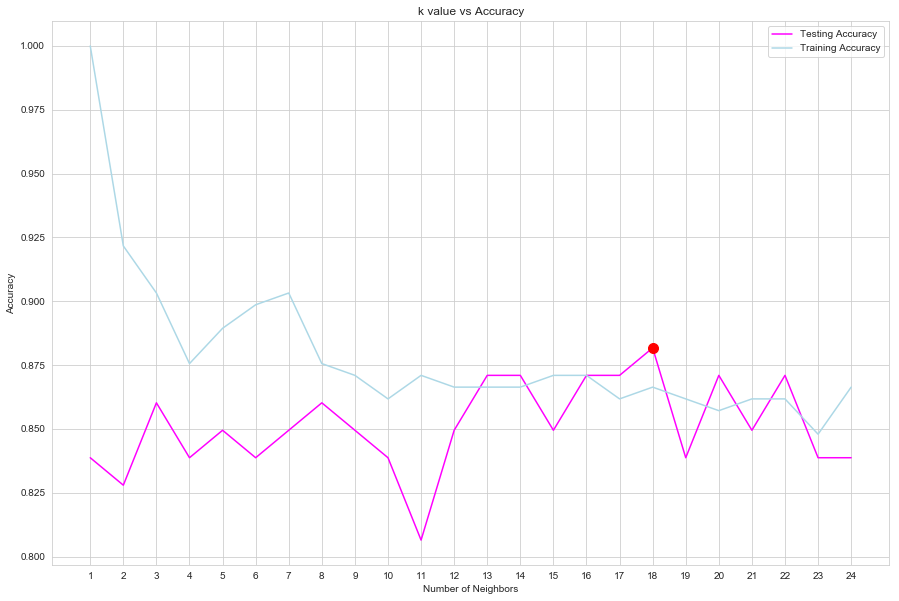

Best  K value = 18 with score = 0.7999999999999999 and  accuracy = 0.8817204301075269 


In [354]:
# Test best k value 
neighbors = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
data2C_f1score = []
# Check different values of k  
for i, k in enumerate(neighbors):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    # f1score
    y_predict = knn.predict(X_test)
    data2C_f1score.append(f1_score(y_test,y_predict))
# Plot
plt.figure(figsize=[15,10])
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy',color='magenta')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy',color='lightblue')
plt.legend()
plt.title('k value vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.plot(1+test_accuracy.index(np.max(test_accuracy)), np.max(test_accuracy),  color='red', marker='o', markersize='10' )
plt.show()
max_test_accuracy = np.max(test_accuracy)
index = test_accuracy.index(max_test_accuracy)
print("Best  K value = {} with score = {} and  accuracy = {} ".format(1+index ,data2C_f1score[index], max_test_accuracy)  )

In [355]:
d = {'k value':neighbors, 'test_accuracy': test_accuracy, 'f1score': data2C_f1score}
pd.DataFrame(data=d)

,k value,test_accuracy,f1score
0,1,0.838710,0.727273
1,2,0.827957,0.636364
2,3,0.860215,0.763636
3,4,0.838710,0.693878
4,5,0.849462,0.758621
5,6,0.838710,0.716981
6,7,0.849462,0.766667
7,8,0.860215,0.763636
8,9,0.849462,0.766667
9,10,0.838710,0.736842


# Import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

#### import data 3C_weka.csv for 3 Class Classifcation

In [356]:
data3C = pd.read_csv('3Classdata.csv')
data3C.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


#### Explore the dataset

In [357]:
print(data3C.shape)

(310, 7)


In [358]:
data3C.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [359]:
data3C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


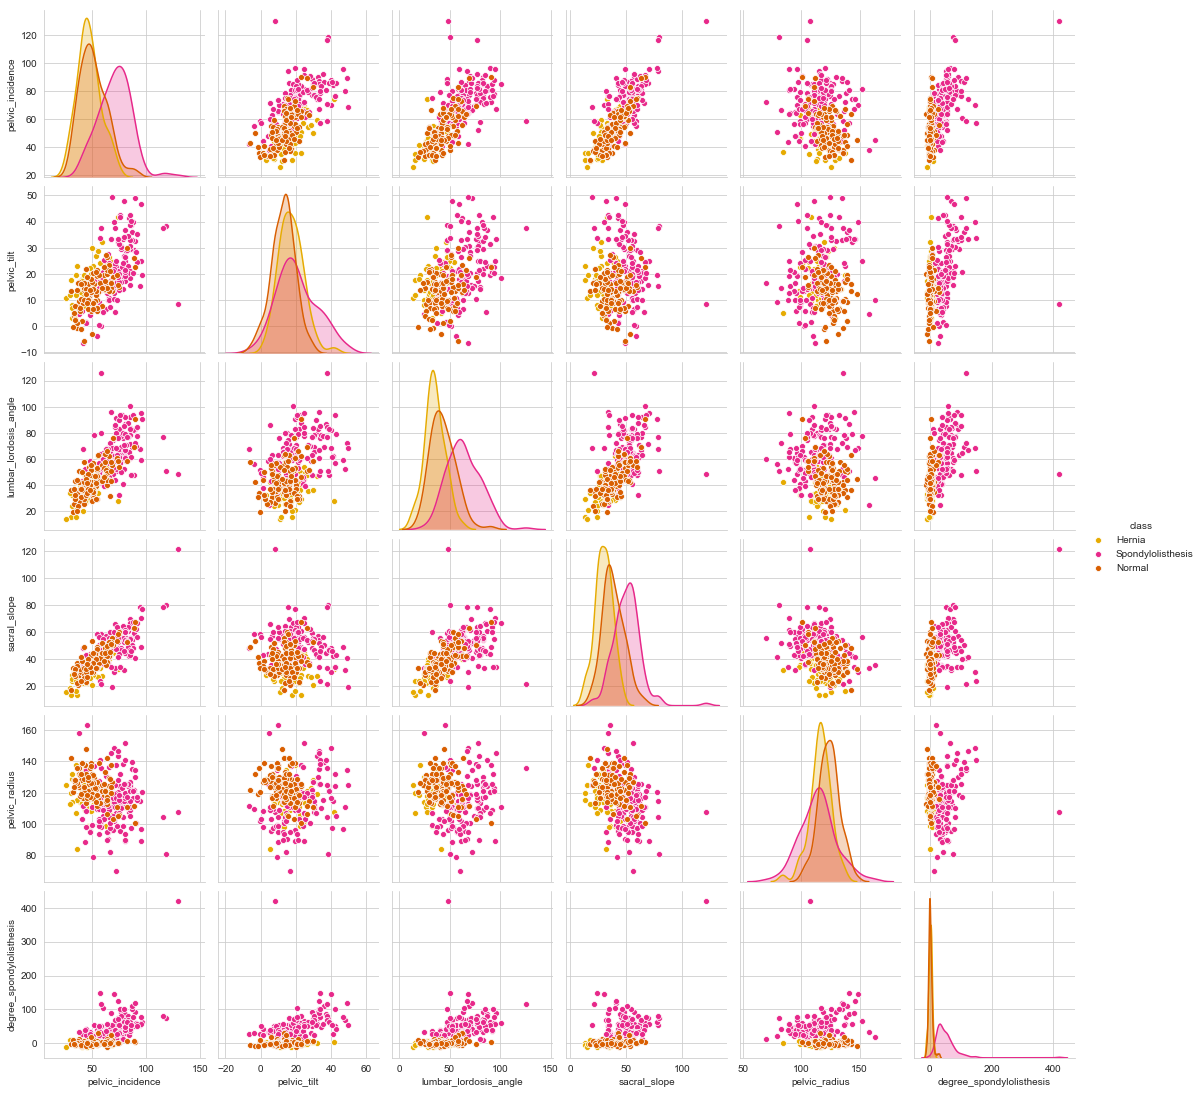

In [360]:
sns.pairplot(data3C,hue='class',palette='Dark2_r')

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

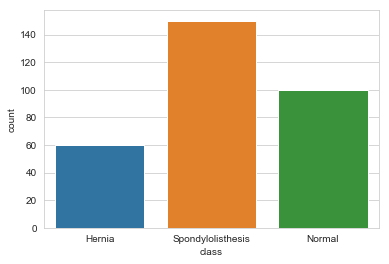

In [361]:
#Counts number of classes
sns.countplot(x="class", data=data3C)
data3C.loc[:,'class'].value_counts()

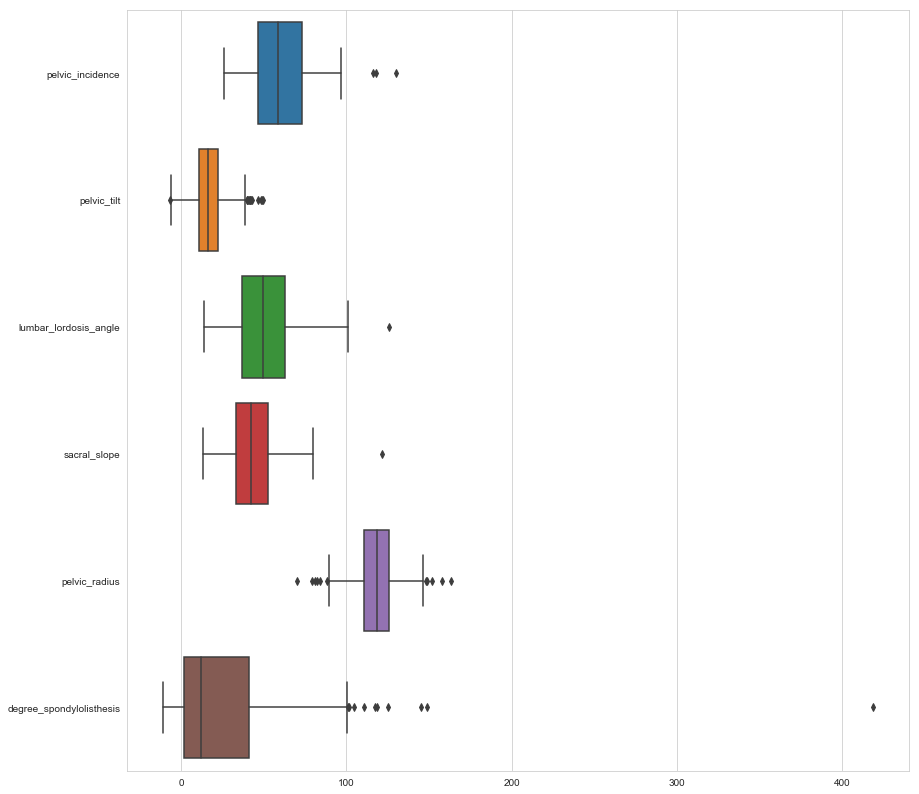

In [362]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,14))
sns.boxplot(data=data3C, orient="h")

In [363]:
data3C.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


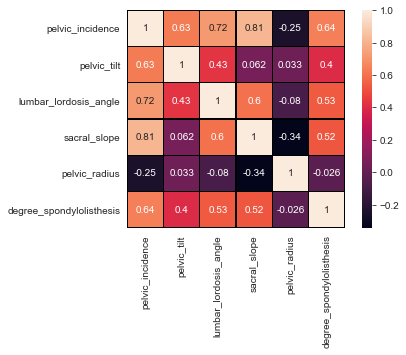

In [364]:
sns.heatmap(data3C.corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='black', annot=True)

In [365]:
data3C_objCol = data3C.select_dtypes(include='object').columns
data3C_objCol

Index(['class'], dtype='object')

#### Encode the Class variable to integer

In [366]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for xCol in data3C_objCol:
    data3C[xCol] = le.fit_transform(data3C[xCol])

In [367]:
data3C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null int64
dtypes: float64(6), int64(1)
memory usage: 17.0 KB


#### Create the X(Feature-set) and Y(Target-set) sets for  Data

In [368]:
# Target values -> class
XX = data3C.drop('class',axis=1)
yy = data3C['class']
# Feature set is remaining features

print(data3C.shape, XX.shape, yy.shape)

(310, 7) (310, 6) (310,)


In [369]:
data3C.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


#### Normalize  Data (X) to get values between 0 to 1

In [370]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
pd.DataFrame(sc.fit_transform(XX))

,0,1,2,3,4,5
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
5,0.136009,0.365744,0.099559,0.119943,0.647879,0.030933
6,0.263150,0.400439,0.207316,0.223960,0.542916,0.039680
7,0.185356,0.309190,0.134581,0.196592,0.507455,0.000890
8,0.170151,0.358811,0.256759,0.156294,0.590614,0.056674
9,0.101638,0.206581,0.250118,0.169425,0.152264,0.027287


#### Split the data as a train and test with a ratio of 70:30

In [371]:
# Train & test,
from sklearn.model_selection import train_test_split
XX_train,XX_test,yy_train,yy_test = train_test_split(XX,yy,test_size = 0.3,random_state = 1) 
print("Training set has {} samples.".format(XX_train.shape[0]))
print("Testing set has {} samples.".format(XX_test.shape[0]))

Training set has 217 samples.
Testing set has 93 samples.


In [394]:
from sklearn.neighbors import KNeighborsClassifier
# for k=10
knn_3C=KNeighborsClassifier(n_neighbors=10)
knn_3C.fit(XX_train,yy_train)
yy_predict = knn_3C.predict(XX_test)

In [395]:
yy_predict

array([2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1,
       0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2,
       1, 1, 0, 1, 2], dtype=int64)

In [396]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
f1score3C = f1_score(yy_test,yy_predict,average=None)
acc_score3C = accuracy_score(yy_test,yy_predict)
print(" Testing Accuracy: {}".format(knn_3C.score(XX_test,yy_test)))
print(" Training Accuracy: {}".format(knn_3C.score(XX_train,yy_train)))

print('\n KNN  score:{} , accuracy:{}'.format(f1score3C,acc_score3C))

 Testing Accuracy: 0.8387096774193549
 Training Accuracy: 0.8571428571428571

 KNN  score:[0.64705882 0.75862069 0.95744681] , accuracy:0.8387096774193549


#### Naive Bayes Classifier

In [397]:
from sklearn.naive_bayes import GaussianNB
gnb_3C = GaussianNB()
gnb_3C.fit(XX_train,yy_train)
yy_predict_gnb = gnb_3C.predict(XX_test)
f1score3C_gnb = f1_score(yy_test,yy_predict_gnb,average=None)
acc_score3C_gnb = accuracy_score(yy_test,yy_predict_gnb)
print('Naive Bayes Classifier\n score:{} , accuracy:{}'.format(f1score3C_gnb,acc_score3C_gnb))

Naive Bayes Classifier
 score:[0.74285714 0.74074074 0.92783505] , accuracy:0.8387096774193549


##### What is the best K value for your classifcation?
#Find at which k value you get the best score.

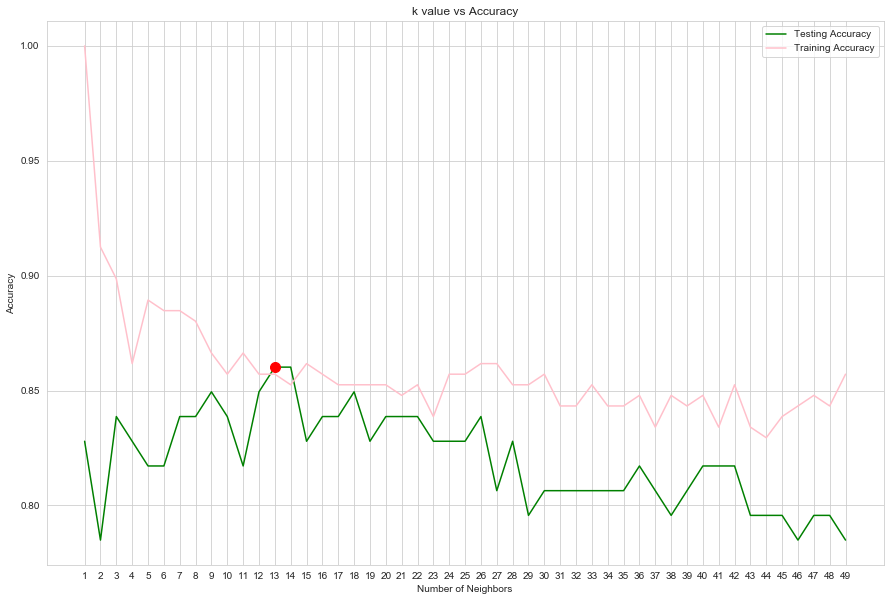

Best  K value = 13 with score = [0.70588235 0.79310345 0.95744681] and  accuracy = 0.8602150537634409 


In [398]:
# Test best k value 
neighbors = np.arange(1, 50)
train_accuracy_3C = []
test_accuracy_3C = []
data3C_f1score_3C = []
# Check different values of k  
for i, k in enumerate(neighbors):
    # k from 1 to 50(exclude)
    knn_3C = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn_3C.fit(XX_train,yy_train)
    #train accuracy
    train_accuracy_3C.append(knn_3C.score(XX_train, yy_train))
    # test accuracy
    test_accuracy_3C.append(knn_3C.score(XX_test, yy_test))
    # f1score
    yy_predict = knn_3C.predict(XX_test)
    data3C_f1score_3C.append(f1_score(yy_test,yy_predict,average=None))
# Plot
plt.figure(figsize=[15,10])
plt.plot(neighbors, test_accuracy_3C, label = 'Testing Accuracy',color='green')
plt.plot(neighbors, train_accuracy_3C, label = 'Training Accuracy',color='pink')
plt.legend()
plt.title('k value vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.plot(1+test_accuracy_3C.index(np.max(test_accuracy_3C)), np.max(test_accuracy_3C),  color='red', marker='o', markersize='10' )
plt.show()
max_test_accuracy_3C = np.max(test_accuracy_3C)
index_3C = test_accuracy_3C.index(max_test_accuracy_3C)
print("Best  K value = {} with score = {} and  accuracy = {} ".format(1+index_3C ,data3C_f1score_3C[index_3C], max_test_accuracy_3C)  )

In [399]:
dd = {'k value':neighbors, 'test_accuracy': test_accuracy_3C, 'f1score': data3C_f1score_3C}
pd.DataFrame(data=dd)

,k value,test_accuracy,f1score
0,1,0.827957,"[0.6486486486486486, 0.7272727272727273, 0.957..."
1,2,0.784946,"[0.6666666666666667, 0.6122448979591836, 0.934..."
2,3,0.838710,"[0.6111111111111113, 0.7636363636363638, 0.968..."
3,4,0.827957,"[0.65, 0.7307692307692308, 0.9574468085106383]"
4,5,0.817204,"[0.5454545454545455, 0.7457627118644067, 0.957..."
5,6,0.817204,"[0.6111111111111113, 0.7142857142857143, 0.957..."
6,7,0.838710,"[0.5999999999999999, 0.7741935483870968, 0.957..."
7,8,0.838710,"[0.6470588235294118, 0.7586206896551724, 0.957..."
8,9,0.849462,"[0.6875, 0.7666666666666667, 0.9574468085106383]"
9,10,0.838710,"[0.6470588235294118, 0.7586206896551724, 0.957..."


# End